# 1. Handling categorical data

Most of the ML libraries are designed to work well with numerical variables. So categorical variables in their original form of text description can’t be directly used for model building. Let’s learn some of the common methods of handling categorical data based on their number of levels.

## Exercise 1: Create dummy variable
Analyze the following code. Then, run it and answer the questions.

In [1]:
import pandas as pd

df = pd.DataFrame({'A': ['high', 'medium', 'low']}, 
                  index = [0, 1, 2])                  
print(df)

        A
0    high
1  medium
2     low


In [2]:
df_with_dummies = pd.get_dummies(df)
print(df_with_dummies)

   A_high  A_low  A_medium
0       1      0         0
1       0      0         1
2       0      1         0


**Questions:**
1. Based on the example above, explain how the **get_dummies()** function works?
2. How many categorical levels (*k*) do we have?
3. How many dumny variables would be sufficient to represent all the categorical *k* levels? Justify your answer.

**Answers:**

## Exercise 2: Convert categories to numeric labels
Analyze the following code. Then, run it and answer the questions.

In [3]:
df = pd.DataFrame({'A': ['b', 'b', 'a', 'a', 'a', 'a', 'a', 'c', 'c', 'd']}, 
                  index = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])                  
print(df)

   A
0  b
1  b
2  a
3  a
4  a
5  a
6  a
7  c
8  c
9  d


In [4]:
from sklearn.preprocessing import LabelEncoder

df['A_pd_factorized'] = pd.factorize(df['A'])[0]
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df.A)
print(df)

   A  A_pd_factorized  A_LabelEncoded
0  b                0               1
1  b                0               1
2  a                1               0
3  a                1               0
4  a                1               0
5  a                1               0
6  a                1               0
7  c                2               2
8  c                2               2
9  d                3               3


**Questions:**
1. Change the number of individual letters *a*, *b*, *c*, *d* and explain what is a difference between the **factorize()** function and the **LabelEncoder** class?
2. What is a difference between the **get_dummies()** function and the **LabelEncoder** class?

**Answers:**

# 2. Rescale data
Unit or scale of measurement for different variables varies, so an analysis with the raw measurement could be artificially skewed towards the variables with higher absolute values. Bringing the different types of variable units in the same order of magnitude eliminates the potential outlier measurements that would misrepresent the finding and negatively affect the accuracy of the conclusion. Two broadly used methods for rescaling data are normalization and standardization.

## Exercise 3: Normalization and standardization
Analyze the following code. Then, run it and answer the question.

In [5]:
from sklearn import datasets
import numpy as np
from sklearn import preprocessing

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

print('Min value before min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].min(), X[:,1].min()))
print('Max value before min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].max(), X[:,1].max()))

print('\nMin value after min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_minmax[:,0].min(), X_minmax[:,1].min()))
print('Max value after min-max scaling: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_minmax[:,0].max(), X_minmax[:,1].max()))

Min value before min-max scaling: petal length = 1.0, petal width = 0.1
Max value before min-max scaling: petal length = 6.9, petal width = 2.5

Min value after min-max scaling: petal length = 0.0, petal width = 0.0
Max value after min-max scaling: petal length = 1.0, petal width = 1.0


In [6]:
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

print('Mean before standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].mean(), X[:,1].mean()))
print('SD before standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X[:,0].std(), X[:,1].std()))

print('\nMean after standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_std[:,0].mean(), X_std[:,1].mean()))
print('SD after standardization: petal length = {:.1f}, petal width = {:.1f}'
      .format(X_std[:,0].std(), X_std[:,1].std()))

Mean before standardization: petal length = 3.8, petal width = 1.2
SD before standardization: petal length = 1.8, petal width = 0.8

Mean after standardization: petal length = -0.0, petal width = -0.0
SD after standardization: petal length = 1.0, petal width = 1.0


**Question:**
1. What are the similarities and differences in the operation of normalization and standardization?

**Answer:**

# 3. Exploratory data analysis
Exploratory data analysis (EDA) is about understanding data by employing summarizing and visualizing techniques. At a high level, the EDA can be performed in two ways i.e., **univariate analysis** and **multivariate analysis**.
We will use the **Iris** dataset that comes as a part of the **scikit-learn** dataset package. It contains some datasets being very popular in the machine learning literature.

## Exercise 4: Load input data
Analyze the following code. Then, run it and answer the question.

In [29]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
print(iris)
type(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

sklearn.utils.Bunch

**Question:**
1. What data structures are there in the **Iris** dataset?

**Answer:**

## Exercise 5: Prepare data for analysis
Analyze the following code. Then, run it and answer the questions.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Convert to dataframe
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                    columns = iris['feature_names'] + ['species'])

# Remove spaces from column name
iris.columns = iris.columns.str.replace(' ', '')

# Replace the values with class labels
iris.species = np.where(iris.species == 0.0, 'setosa', 
                        np.where(iris.species == 1.0, 'versicolor', 'virginica'))

# Information on the shape (dimension) of the data
print(iris.shape)

# Display of the selected data fragment
iris.tail()

(150, 5)


,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


**Questions:**
1. What is the operation of the individual commands?
2. How should the result of the **iris.shape** command be interpreted?
3. What results return functions **head(10)** and **tail()**?

**Answers:**

## 3.1. Univariate analysis
Individual variables are analyzed in isolation to get a better understanding of them.

## Exercise 6: Summary statistics
Pandas provides the **describe()** function to create summary statistics in tabular format for all variables. These statistics are very useful for the numerical type of variables to understand any quality issues such as missing value and presence of outliers. The column **species** is categorical, so we can check the frequency distribution for each category. Analyze the following code. Then, run it and answer the question.

In [31]:
print(iris.describe())
print()
print(iris['species'].value_counts())

       sepallength(cm)  sepalwidth(cm)  petallength(cm)  petalwidth(cm)
count       150.000000      150.000000       150.000000      150.000000
mean          5.843333        3.057333         3.758000        1.199333
std           0.828066        0.435866         1.765298        0.762238
min           4.300000        2.000000         1.000000        0.100000
25%           5.100000        2.800000         1.600000        0.300000
50%           5.800000        3.000000         4.350000        1.300000
75%           6.400000        3.300000         5.100000        1.800000
max           7.900000        4.400000         6.900000        2.500000

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64


**Question:**
1. What information can you obtain from the statistics displayed above?

**Answer:**

## Exercise 7: Histograms and box plots
Pandas supports plotting functions to quick visualization on attributes. Analyze the following code. Then, run it and answer the questions.

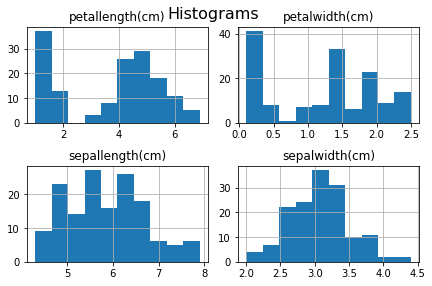

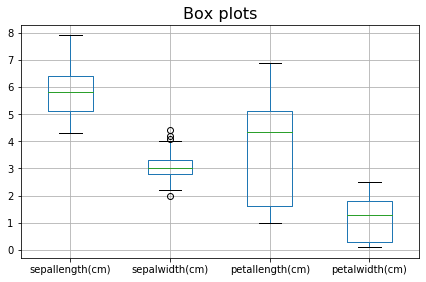

In [32]:
# Histograms
iris.hist()        
plt.suptitle('Histograms', fontsize = 16)
plt.tight_layout(pad = 1)
plt.show()

# Boxplots
iris.boxplot()     
plt.title('Box plots', fontsize = 16)
plt.tight_layout(pad = 1)
plt.show()

**Questions:**
1. What conclusions can you draw from the observation of histograms?
2. What conclusions can you draw from the observation of boxplots?

**Answers:**

## 3.2. Multivariate analysis
In multivariate analysis we try to estabilish a sense of relationship of all variables with one other.

## Exercise 8: Comparison of mean values for individual classes
Analyze the following code. Then, run it and answer the questions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000199E3298748>,
      dtype=object)

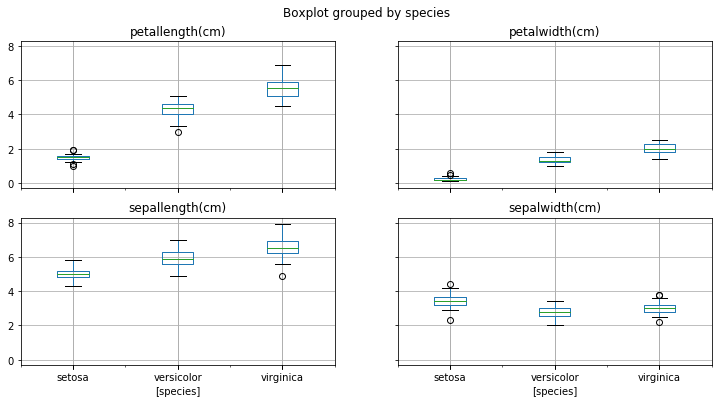

In [33]:
# Boxplots split out by species
iris.boxplot(by = "species", figsize = (12, 6))

In [34]:
# Printing the mean for each column by species
iris.groupby(by = 'species').mean()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


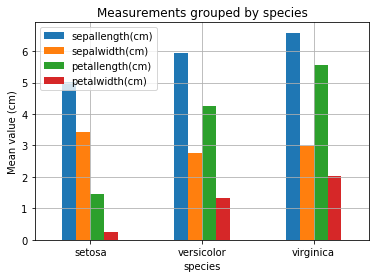

In [35]:
# Barplots of mean values of individual features by class
iris.groupby(by = 'species').mean().plot(kind = 'bar')
plt.title('Measurements grouped by species')
plt.ylabel('Mean value (cm)')
plt.xticks(rotation = 0)
plt.legend(loc='upper left')
plt.grid(True)

**Questions:**
1. Based on the boxplots, what measurements do you think are more appropriate to distinguish between the different species and why?
2. Can you infer anything about the similarity between species from the last graph (**Measurements grouped by species**)? Justify your answer.

**Answers:**

## Exercise 9: Correlation matrix
Correlation function uses **Pearson** correlation coefficient which results in a number between **-1** to **1**. **Strong negative** relationship is indicated by a coefficient towards **-1** and a **strong positive** correlation is indicated by a coefficient towards **1**. Analyze the following code. Then, run it and answer the question.

In [36]:
corr = iris.corr()
print(corr)

                 sepallength(cm)  sepalwidth(cm)  petallength(cm)  \
sepallength(cm)         1.000000       -0.117570         0.871754   
sepalwidth(cm)         -0.117570        1.000000        -0.428440   
petallength(cm)         0.871754       -0.428440         1.000000   
petalwidth(cm)          0.817941       -0.366126         0.962865   

                 petalwidth(cm)  
sepallength(cm)        0.817941  
sepalwidth(cm)        -0.366126  
petallength(cm)        0.962865  
petalwidth(cm)         1.000000  


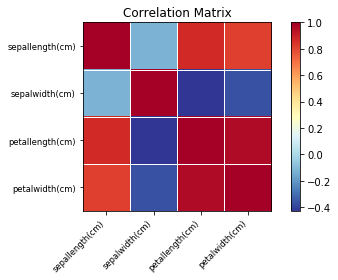

In [37]:
import statsmodels.api as sm

sm.graphics.plot_corr(corr, xnames = list(corr.columns))
plt.show()

**Question:**
1. Based on the above results, which features are strongly correlated and which are weak correlated? Give the numerical values.

**Answer:**

## Exercise 10: Pair plot
Pair plots help us understand the relationship between attributes by looking at the distribution of the interactions of each pair of attributes. The **scatter_matrix()** function is used to create a matrix of scatter plots of all attributes against all attributes. Analyze the following code. Then, run it and answer the question.

Text(0.5, 0.98, 'Pair plot')

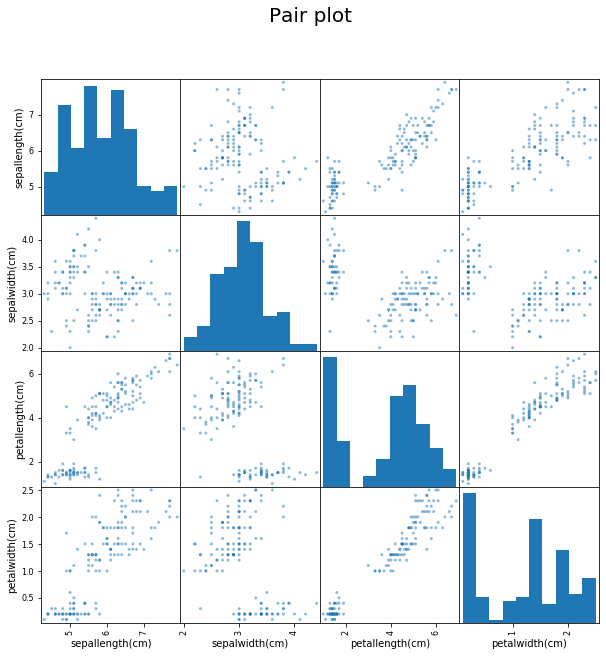

In [38]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, figsize = (10, 10))
plt.suptitle('Pair plot', fontsize = 20)

**Question:**
1. Based on the plot above, which pairs of features do you think are more appropriate to distinguish between the different species and why?

**Answer:**

## Exercise 11: Findings of exploratory data analysis
**Based on the exercises you have done, answer the following questions:**
1. Are there missing values?
2. What is longer, sepal or petal? What is the range of the sepal and petal length changes and their average values?
3. What is wider, sepal or petal? What is the range of the sepal and petal width changes and their average values?
4. What is the average petal length and width of setosa compared to versicolor and virginica?
5. What is the correlation between the petal length and width?
6. What is the correlation between the petal length and sepal width?
7. What can you say about the similarity of different iris species based on length and width of sepal and petal?

**Answers:**